Naive Bayes

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [109]:
from google.colab import files 
uploaded = files.upload()

df=pd.read_csv('data-modified.csv')
df.head()

Saving data-modified.csv to data-modified (5).csv


,school,sex,age,address,famsize,Pstatus,highu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,Dalc,Walc,Avgalc,Alcuse,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,3,6,1,1,1,low,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,1,1,1,low,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,3,10,2,3,3,high,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,1,1,1,low,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,1,2,2,low,6,10,10


In [110]:
df.shape

(395, 35)

In [111]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
highu         0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
Dalc          0
Walc          0
Avgalc        0
Alcuse        0
G1            0
G2            0
G3            0
dtype: int64

In [112]:

# To convert Categorical variables into numeric form

df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=np.where(df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=='no',0,1)
df[['sex']]=np.where(df[['sex']]=='F',0,1)
df[['address']]=np.where(df[['address']]=='R',0,1)
df[['famsize']]=np.where(df[['famsize']]=='LE3',0,1)
df[['Pstatus']]=np.where(df[['Pstatus']]=='A',0,1)
df[['guardian']]=np.where(df[['guardian']]=='mother',0,1)
df = df.drop(columns=['school','Mjob','Fjob','reason','address','nursery','higher','Fedu','address'])

df.head()

,sex,age,famsize,Pstatus,highu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,health,absences,Dalc,Walc,Avgalc,Alcuse,G1,G2,G3
0,0,18,1,0,4,0,2,2,0,1,0,0,0,0,0,4,3,4,3,6,1,1,1,low,5,6,6
1,0,17,1,1,1,1,1,2,0,0,1,0,0,1,0,5,3,3,3,4,1,1,1,low,5,5,6
2,0,15,0,1,1,0,1,2,3,1,0,1,0,1,0,4,3,2,3,10,2,3,3,high,7,8,10
3,0,15,1,1,4,0,1,3,0,0,1,1,1,1,1,3,2,2,5,2,1,1,1,low,15,14,15
4,0,16,1,1,3,1,1,2,0,0,1,1,0,0,0,4,3,2,5,4,1,2,2,low,6,10,10


In [113]:
#split the dataset into train and test 
x_train, x_test = train_test_split(df, test_size = 0.25, random_state = 0)
x_train.shape
x_test.shape

(99, 27)

In [131]:
gnb = GaussianNB()

used_features1 = ['sex',	'age' , 'famsize'	, 'Pstatus' ,	'highu' ,	'guardian' , 'traveltime'	,
                'studytime' ,	'failures' ,	'schoolsup' ,	'famsup' ,	'paid'	, 'activities' ,	
                'internet' ,	'romantic' ,'famrel' ,	'freetime' ,	'goout' ,	'health' ,	'absences' ,	'Dalc' ,	'Walc']

In [133]:
gnb.fit(x_train[used_features].values,x_train['Alcuse'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [134]:
y_pred=gnb.predict(x_test[used_features])

In [135]:
#Step 5: Splitting data set into train and testX_train,X_test=train_test_split(data,test_size=0.25,random_state=0)X_train.shapeX_test.shapeStep6: Definingthe classifiergnb=GaussianNB()used_features=['Pclass','Sex_cleaned','Age','SibSp','Parch','Fare','Embarked_cleaned']Step7: Trainingthe classfiergnb.fit(X_train[used_features].values,X_train['Survived'])Step8: Making predictionsy_pred=gnb.predict(X_test[used_features])Step9: Printing the results
Total_samples_tested=x_test.shape[0]
print(Total_samples_tested)
Mislabeled_points=(x_test['Alcuse'] != y_pred).sum()
print(Mislabeled_points)
Performance=100-100*(Mislabeled_points/Total_samples_tested)
print(Performance)

99
4
95.95959595959596


In [138]:
df1 = pd.DataFrame({'Actual Status':x_test['Alcuse'], 'Predicted status':y_pred })
print(df1)

    Actual Status Predicted status
329           low              low
318          high             high
317           low              low
65            low              low
59            low              low
..            ...              ...
239          high             high
63           high             high
245           low              low
154           low              low
311           low              low

[99 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


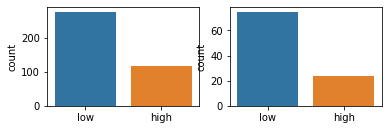

In [120]:
n = df.loc[:,'Alcuse'].values
matplotlib.pyplot.subplot(2,2,1,)
sns.countplot(n,data=df)
matplotlib.pyplot.subplot(2,2,2)
sns.countplot(y_pred,data=df)

